CPU only pytorch install

Install with condo:
conda install -c pytorch pytorch torchvision cpuonly

Install with pip
pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

In [33]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [34]:
# folder path
mnist_dataset_path = "data"

In [35]:
# Transform to convert images to Tensors and normalize to [0, 1]
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0,), (1,))]
)

In [36]:
train_dataset = datasets.MNIST(
    root=mnist_dataset_path, train=True, download=True, transform=transform
)
test_dataset = datasets.MNIST(
    root=mnist_dataset_path, train=False, download=True, transform=transform
)

In [37]:
train_batch = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_batch = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [38]:
train_batch_images, train_batch_labels = next(iter(train_batch))

# Verify dimensions and scale
print(f"Train Image batch shape: {train_batch_images.shape}")
print(f"Train Label batch shape: {train_batch_labels.shape}")
print(f"Train Min pixel value: {train_batch_images.min()}")
print(f"Train Max pixel value: {train_batch_images.max()}")

Train Image batch shape: torch.Size([64, 1, 28, 28])
Train Label batch shape: torch.Size([64])
Train Min pixel value: 0.0
Train Max pixel value: 1.0


In [39]:
test_batch_images, test_batch_labels = next(iter(test_batch))

# Verify dimensions and scale
print(f"Test Image batch shape: {test_batch_images.shape}")
print(f"Test Label batch shape: {test_batch_labels.shape}")
print(f"Test Min pixel value: {test_batch_images.min()}")
print(f"Test Max pixel value: {test_batch_images.max()}")

Test Image batch shape: torch.Size([64, 1, 28, 28])
Test Label batch shape: torch.Size([64])
Test Min pixel value: 0.0
Test Max pixel value: 1.0


In [40]:
def plot_images(images, labels, title):
    plt.figure(figsize=(10, 4))
    for i in range(5):
        image = images[i]
        label = labels[i]
        image = image.squeeze(0).numpy()
        plt.subplot(1, 5, i + 1)
        plt.imshow(image, cmap="gray")
        plt.title(f"label: {label}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

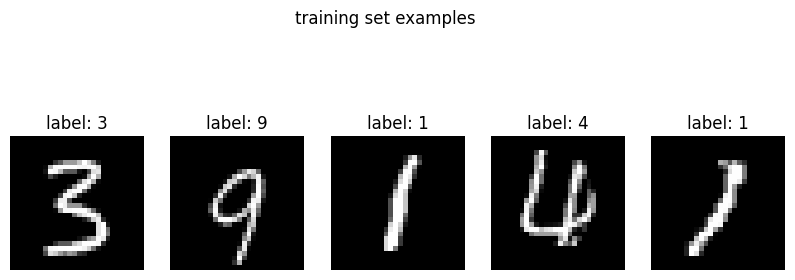

In [41]:
# plot for training data set
plot_images(train_batch_images, train_batch_labels, "training set examples")

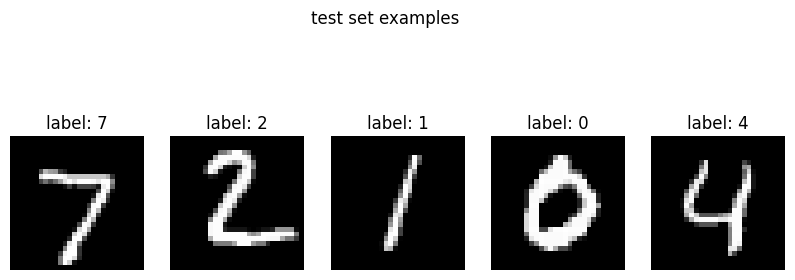

In [42]:
# plot for training data set
plot_images(test_batch_images, test_batch_labels, "test set examples")

In [43]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available() else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [44]:
# https://www.geeksforgeeks.org/how-to-implement-neural-networks-in-pytorch/
# https://medium.com/@myringoleMLGOD/simple-neural-network-for-dummies-in-pytorch-a-step-by-step-guide-38c4b1c914c0
# https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html#define-the-class
class Assignment6FFNetworkProb2(nn.Module):
    def __init__(self):
        super().__init__()
        input_size = 28 * 28
        hidden_layer = 50
        output_size = 10
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, hidden_layer),
            nn.ReLU(),
            nn.Linear(hidden_layer, output_size),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [45]:
model = Assignment6FFNetworkProb2().to(device)
print(model)

Assignment6FFNetworkProb2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=10, bias=True)
  )
)


In [46]:
def train_and_test_model(eval_model, optimizer_model, criterion_model):
    eval_model.train()
    for images, labels in train_batch:
        # Forward pass
        outputs = eval_model(images)
        loss = criterion_model(outputs, labels)

        # Backward pass
        optimizer_model.zero_grad()
        loss.backward()
        optimizer_model.step()

    eval_model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_batch:
            logits = eval_model(images)
            pred_probab = nn.Softmax(dim=1)(logits)
            y_pred = pred_probab.argmax(1)

            correct += (y_pred == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    return accuracy

In [47]:
# problem 2
epoch_run_time = 10

model_sim = Assignment6FFNetworkProb2()
criterion_sim = nn.CrossEntropyLoss()
optimizer_sim = optim.SGD(model_sim.parameters(), lr=0.01)

for epoch in range(epoch_run_time):
    accuracy = train_and_test_model(model_sim, optimizer_sim, criterion_sim)
    print(f"Epoch [{epoch + 1}/{epoch_run_time}], Validation Accuracy: {accuracy:.2f}%")

Epoch [1/10], Validation Accuracy: 86.00%
Epoch [2/10], Validation Accuracy: 88.98%
Epoch [3/10], Validation Accuracy: 90.00%
Epoch [4/10], Validation Accuracy: 90.64%
Epoch [5/10], Validation Accuracy: 91.20%
Epoch [6/10], Validation Accuracy: 91.48%
Epoch [7/10], Validation Accuracy: 91.83%
Epoch [8/10], Validation Accuracy: 92.19%
Epoch [9/10], Validation Accuracy: 92.39%
Epoch [10/10], Validation Accuracy: 92.59%


In [48]:
# problem 3
class Assignment6FFNetworkProb3(nn.Module):
    def __init__(self):
        super().__init__()
        input_size = 28 * 28
        hidden_layer_1 = 500
        hidden_layer_2 = 300
        output_size = 10
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, hidden_layer_1),
            nn.ReLU(),
            nn.Linear(hidden_layer_1, hidden_layer_2),
            nn.ReLU(),
            nn.Linear(hidden_layer_2, output_size),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [49]:
model = Assignment6FFNetworkProb3().to(device)
print(model)

Assignment6FFNetworkProb3(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=300, bias=True)
    (3): ReLU()
    (4): Linear(in_features=300, out_features=10, bias=True)
  )
)


In [50]:
epoch_run_time = 40

model_new = Assignment6FFNetworkProb3()
criterion_new = nn.CrossEntropyLoss()
# weight_decay: L2 regularization parameter
optimizer_new = optim.SGD(model_new.parameters(), lr=0.01, weight_decay=5e-7)

for epoch in range(epoch_run_time):
    accuracy = train_and_test_model(model_new, optimizer_new, criterion_new)
    print(f"Epoch [{epoch + 1}/{epoch_run_time}], Validation Accuracy: {accuracy:.2f}%")

Epoch [1/40], Validation Accuracy: 82.73%
Epoch [2/40], Validation Accuracy: 88.58%
Epoch [3/40], Validation Accuracy: 90.15%
Epoch [4/40], Validation Accuracy: 91.35%
Epoch [5/40], Validation Accuracy: 92.29%
Epoch [6/40], Validation Accuracy: 92.83%
Epoch [7/40], Validation Accuracy: 93.17%
Epoch [8/40], Validation Accuracy: 93.68%
Epoch [9/40], Validation Accuracy: 93.78%
Epoch [10/40], Validation Accuracy: 94.22%
Epoch [11/40], Validation Accuracy: 94.37%
Epoch [12/40], Validation Accuracy: 94.84%
Epoch [13/40], Validation Accuracy: 95.06%
Epoch [14/40], Validation Accuracy: 95.21%
Epoch [15/40], Validation Accuracy: 95.36%
Epoch [16/40], Validation Accuracy: 95.58%
Epoch [17/40], Validation Accuracy: 95.79%
Epoch [18/40], Validation Accuracy: 95.94%
Epoch [19/40], Validation Accuracy: 96.09%
Epoch [20/40], Validation Accuracy: 96.14%
Epoch [21/40], Validation Accuracy: 96.28%
Epoch [22/40], Validation Accuracy: 96.42%
Epoch [23/40], Validation Accuracy: 96.55%
Epoch [24/40], Valid

In [51]:
# problem 4
class Assignment6FFCNNNetworkProb4(nn.Module):
    def __init__(self):
        super(Assignment6FFCNNNetworkProb4, self).__init__()

        # First 2D convolutional layer, taking in 1 input channel (image),
        # outputting 32 convolutional features, with a square kernel size of 3
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        # Second 2D convolutional layer, taking in the 32 input layers,
        # outputting 64 convolutional features, with a square kernel size of 3
        self.conv2 = nn.Conv2d(32, 64, 3, 1)

        # Designed to ensure that adjacent pixels are either all 0s or all active
        # with an input probability
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)

        # First fully connected layer
        self.fc1 = nn.Linear(9216, 128)
        # Second fully connected layer that outputs our 10 labels
        self.fc2 = nn.Linear(128, 10)

    # x represents our data
    def forward(self, x):
        # Pass data through conv1
        x = self.conv1(x)
        # Use the rectified-linear activation function over x
        x = F.relu(x)

        x = self.conv2(x)
        x = F.relu(x)

        # Run max pooling over x
        x = F.max_pool2d(x, 2)
        # Pass data through dropout1
        x = self.dropout1(x)
        # Flatten x with start_dim=1
        x = torch.flatten(x, 1)
        # Pass data through ``fc1``
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)

        # Apply softmax to x
        output = F.log_softmax(x, dim=1)
        return output

In [52]:
def train_and_test_CNN_model(eval_model, optimizer_model, criterion_model):
    eval_model.train()
    for images, labels in train_batch:
        # Forward pass
        outputs = eval_model(images)
        loss = criterion_model(outputs, labels)

        # Backward pass
        optimizer_model.zero_grad()
        loss.backward()
        optimizer_model.step()

    eval_model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_batch:
            result = eval_model(images)
            #different from method above
            y_pred = result.argmax(1)

            correct += (y_pred == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    return accuracy

In [53]:
# Initialize the network, loss function, and optimizer
epoch_run_time = 40

model_conv = Assignment6FFCNNNetworkProb4()
criterion_conv = nn.CrossEntropyLoss()
optimizer_conv = optim.SGD(model_conv.parameters(), lr=0.01, weight_decay=1e-4)

for epoch in range(epoch_run_time):
    accuracy = train_and_test_CNN_model(model_new, optimizer_new, criterion_new)
    print(f"Epoch [{epoch + 1}/{epoch_run_time}], Validation Accuracy: {accuracy:.2f}%")

Epoch [1/40], Validation Accuracy: 97.67%
Epoch [2/40], Validation Accuracy: 97.58%
Epoch [3/40], Validation Accuracy: 97.61%
Epoch [4/40], Validation Accuracy: 97.75%
Epoch [5/40], Validation Accuracy: 97.71%
Epoch [6/40], Validation Accuracy: 97.85%
Epoch [7/40], Validation Accuracy: 97.79%
Epoch [8/40], Validation Accuracy: 97.81%
Epoch [9/40], Validation Accuracy: 97.83%
Epoch [10/40], Validation Accuracy: 97.83%
Epoch [11/40], Validation Accuracy: 97.87%
Epoch [12/40], Validation Accuracy: 97.84%
Epoch [13/40], Validation Accuracy: 97.88%
Epoch [14/40], Validation Accuracy: 97.91%
Epoch [15/40], Validation Accuracy: 97.81%
Epoch [16/40], Validation Accuracy: 97.86%
Epoch [17/40], Validation Accuracy: 97.97%
Epoch [18/40], Validation Accuracy: 97.97%
Epoch [19/40], Validation Accuracy: 98.01%
Epoch [20/40], Validation Accuracy: 97.92%
Epoch [21/40], Validation Accuracy: 97.99%
Epoch [22/40], Validation Accuracy: 97.95%
Epoch [23/40], Validation Accuracy: 98.00%
Epoch [24/40], Valid